#Heart Disease Classification Problem using ML


##Step 1: Data Preprocessing

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:

df = pd.read_csv('heart.csv') #read the csv file

df.head() # print first 5 rows of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

In [ ]:
df.describe() #used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

##Step 2: Exploratory Data Analysis (EDA)

<Axes: xlabel='target', ylabel='count'>

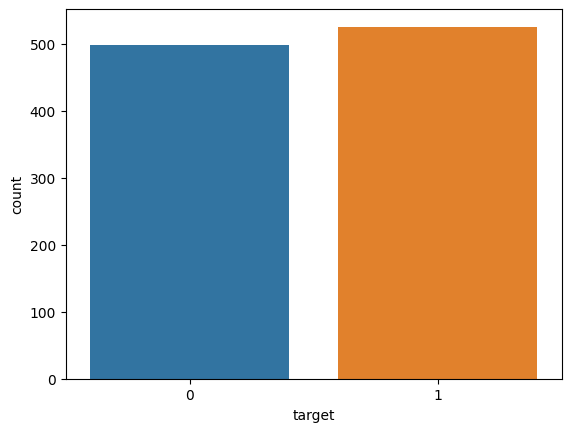

In [ ]:
import seaborn as sns

# Visualize the target variable distribution
sns.countplot(data=df, x='target')


<Axes: xlabel='thal', ylabel='sex'>

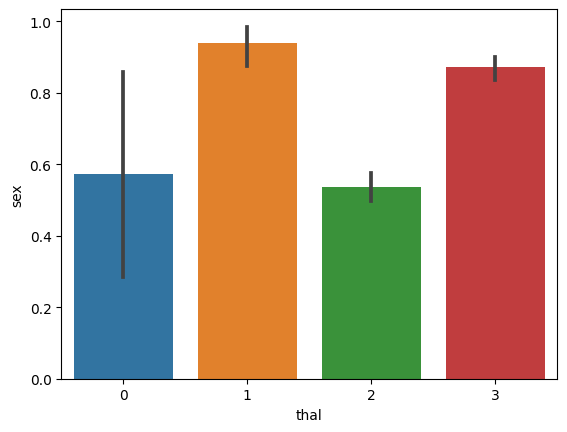

In [ ]:
#barplot
sns.barplot(data=df, x='thal',y='sex')

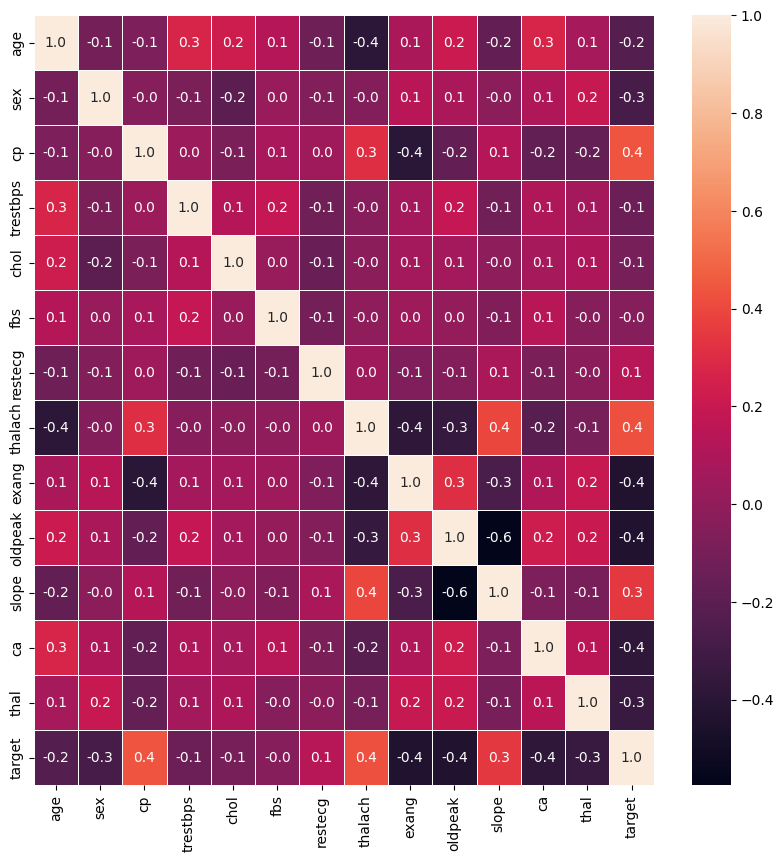

In [ ]:
#heatmap
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

##Step 3: Model Implementation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

In [ ]:
# Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#X_train

###Apply algorithms

1.   Logistic Regression
2.   Random Forest algo
3.   KMeans Algo





In [ ]:
#1.Logistic Regression

from sklearn.linear_model import LogisticRegression
# Initialize the model
model = LogisticRegression()
# Fit the model to the training data
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##Step 4: Model Evaluation

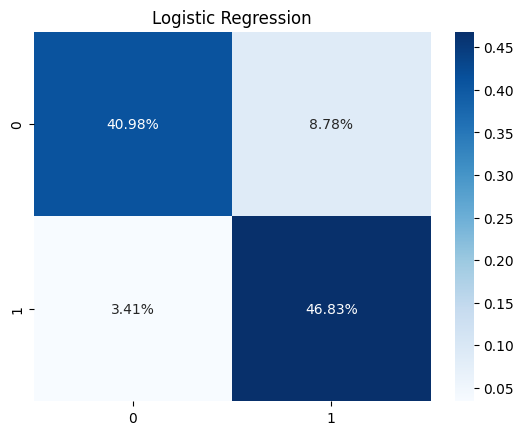

Accuracy is:  87.8048780487805
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       102
           1       0.84      0.93      0.88       103

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred1 = model.predict(X_test)

# Evaluate the model
#print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.title('Logistic Regression')
plt.show()
ac = accuracy_score(y_test,y_pred1)
print('Accuracy is: ',ac*100)
print(classification_report(y_test, y_pred1))

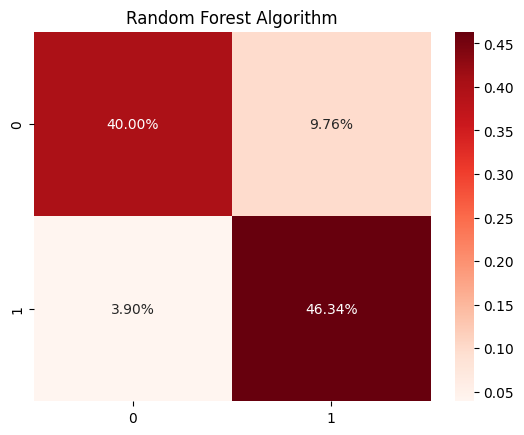

Accuracy is:  86.34146341463415


In [ ]:
#2.Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Reds')
plt.title('Random Forest Algorithm')
plt.show()
ac = accuracy_score(y_test,y_pred2)
print('Accuracy is: ',ac*100)

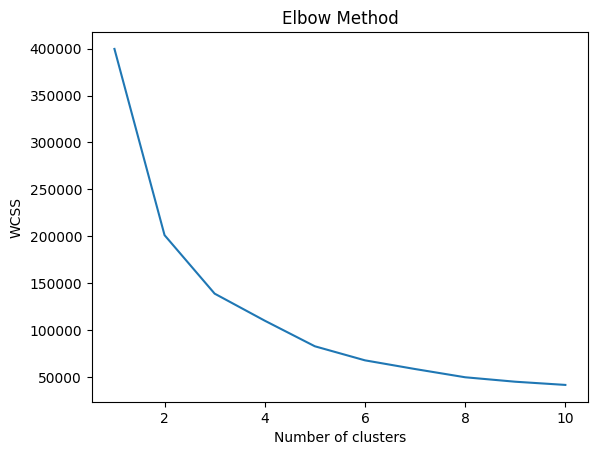

In [ ]:
#Determine the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
X = df.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
#Train the k-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=2)
y_kmeans = kmeans.fit_predict(X)

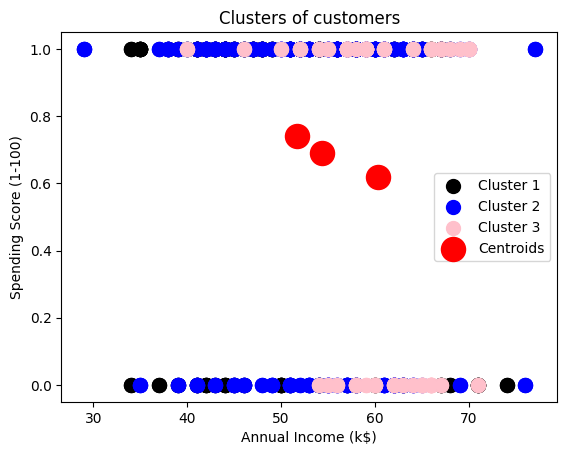

In [ ]:
#Visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'black', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'pink', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


##Step 5: Cross-Validation and Overfitting Check

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
confusion = confusion_matrix(y_test, y_pred1)

accuracy1 = accuracy_score(y_test, y_pred2)
precision1 = precision_score(y_test, y_pred2)
recall1 = recall_score(y_test, y_pred2)
f1_1 = f1_score(y_test, y_pred2)
confusion1 = confusion_matrix(y_test, y_pred2)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print('Logistic Regression')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion matrix:', confusion)

print('Random Forest Tree')
print('Accuracy:', accuracy1)
print('Precision:', precision1)
print('Recall:', recall1)
print('F1-score:', f1_1)
print('Confusion matrix:', confusion1)

Cross-validation scores: [0.95731707 0.91463415 0.94512195 0.93292683 0.86585366]
Mean cross-validation score: 0.9231707317073171
Logistic Regression
Accuracy: 0.8780487804878049
Precision: 0.8421052631578947
Recall: 0.9320388349514563
F1-score: 0.8847926267281107
Confusion matrix: [[84 18]
 [ 7 96]]
Random Forest Tree
Accuracy: 0.8634146341463415
Precision: 0.8260869565217391
Recall: 0.9223300970873787
F1-score: 0.8715596330275228
Confusion matrix: [[82 20]
 [ 8 95]]


In [ ]:
result=pd.DataFrame({'Model':['Logistic Regression','Random Forest Classifier'],
                     'Accuracy':[recall_score(y_pred1,y_test)*100,recall_score(y_pred2,y_test)*100,]})

In [ ]:
result

,Model,Accuracy
0,Logistic Regression,84.210526
1,Random Forest Classifier,82.608696
